In [1]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Hiragino Sans"
import seaborn as sns
import seaborn.objects as so
import numpy as np
import pandas as pd

import pymc as pm
import arviz as az

from math import gamma

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# ベルヌーイ分布 (pm.Bernoulli クラス)

$$
P(X=k) = p^{k} \cdot (1 - p)^{1-k}
$$

In [2]:
p = 0.5
with pm.Model() as model1:
    x = pm.Bernoulli("x", p=p)

with model1:
    prior_samples1 = pm.sample_prior_predictive(random_seed=42)

x_samples1 = prior_samples1["prior"]["x"].to_numpy()
print(x_samples1)

Sampling: [x]


[[1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1
  0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0
  0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1
  1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
  1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1
  0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1
  1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1
  0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1
  1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0
  1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0
  1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1
  0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0
  1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1
  0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 

In [3]:
summary1 = az.summary(prior_samples1, kind="stats")
display(summary1)

,mean,sd,hdi_3%,hdi_97%
x,0.512,0.5,0.0,1.0


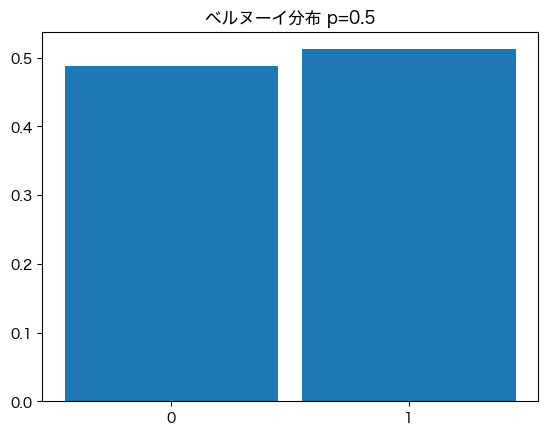

In [4]:
ax = az.plot_dist(x_samples1)
ax.set_title(f"ベルヌーイ分布 p={p}");

# 二項分布 (pm.Binomial クラス)

$$
P(X=k) = \binom{n}{k} \cdot p^{k}(1 - p)^{n - k}
$$

Sampling: [x]


[[4 4 4 2 4 1 5 3 1 2 3 1 2 4 2 1 4 0 3 3 1 2 3 4 1 3 1 3 3 3 2 3 1 3 3 3
  0 4 3 1 2 4 3 1 3 3 2 1 1 3 3 2 2 4 4 3 4 3 4 3 5 4 3 2 3 3 3 1 1 2 1 2
  1 1 3 3 2 3 3 4 1 1 3 3 2 2 2 2 3 3 2 2 1 3 2 0 3 4 2 2 2 3 2 4 4 4 1 4
  5 3 1 4 3 3 1 3 3 2 2 3 2 3 3 4 4 1 3 3 4 3 3 4 3 5 3 3 3 2 4 3 3 2 3 3
  3 4 1 4 2 4 3 1 4 4 3 4 2 3 5 2 0 3 2 2 2 3 0 0 2 1 2 4 1 2 3 2 3 3 3 3
  2 1 3 2 2 4 2 3 3 2 2 2 1 3 1 1 3 2 3 1 3 4 3 2 2 2 2 1 2 2 2 4 4 2 2 4
  3 2 3 2 0 3 3 4 3 3 4 2 3 3 2 3 3 1 4 3 1 3 2 4 4 3 4 1 5 2 3 2 2 3 3 4
  2 1 2 4 2 2 3 1 3 3 4 2 2 4 2 2 2 4 2 1 3 2 4 2 2 3 1 2 1 2 1 4 3 5 1 3
  3 2 1 4 2 1 1 2 3 4 2 3 1 3 5 3 2 3 2 2 1 4 3 4 4 3 3 2 2 1 2 2 2 3 4 1
  3 2 3 1 4 2 1 3 3 1 2 3 2 1 1 2 1 2 2 2 2 5 2 2 1 2 4 4 3 3 1 2 5 3 3 2
  4 2 4 2 0 4 2 1 3 2 3 2 1 1 3 1 3 3 2 3 3 2 1 1 1 4 3 3 2 1 2 2 5 2 3 3
  2 1 2 4 2 4 2 2 0 3 2 2 3 1 1 4 3 3 4 4 3 4 1 5 4 3 3 5 3 4 3 3 2 2 3 2
  4 1 1 2 3 3 4 2 2 2 2 3 2 2 4 2 0 2 3 1 2 2 3 4 3 3 3 1 4 0 4 4 2 2 1 4
  1 3 2 0 0 3 2 2 3 3 4 4 2 1 2 3 2 2 

,mean,sd,hdi_3%,hdi_97%
x,2.522,1.103,1.0,4.0


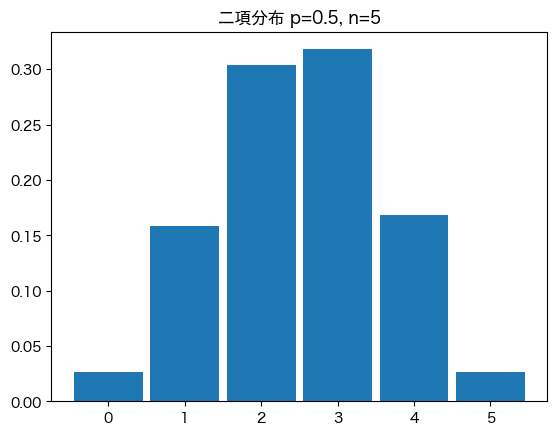

In [5]:
p = 0.5
n = 5

with pm.Model() as model2:
    x = pm.Binomial("x", p=p, n=n)

with model2:
    prior_samples2 = pm.sample_prior_predictive(random_seed=42)

x_samples2 = prior_samples2["prior"]["x"].to_numpy()
print(x_samples2)

summary2 = az.summary(prior_samples2, kind="stats")
display(summary2)

ax = az.plot_dist(x_samples2)
ax.set_title(f"二項分布 p={p}, n={n}");

Sampling: [x]


[[30 30 29 23 31 22 34 27 21 24 26 22 23 30 25 20 30 17 27 25 22 24 28 29
  20 26 21 26 27 28 23 26 20 26 28 27 18 29 27 19 22 29 26 21 27 28 23 19
  20 25 25 22 24 31 29 26 31 26 29 27 32 30 26 24 27 25 26 20 19 23 20 24
  19 21 26 25 25 28 26 28 20 20 27 26 22 24 24 25 25 26 25 22 20 27 24 18
  26 29 24 23 24 27 22 28 29 30 19 30 32 28 19 28 26 26 22 27 25 24 25 27
  23 26 27 30 30 20 28 26 28 26 27 30 26 32 28 26 27 23 31 27 26 23 28 26
  25 29 20 28 25 30 27 20 29 28 26 30 23 28 32 24 18 27 24 24 23 25 17 16
  24 20 25 30 21 24 26 22 27 27 28 26 23 21 25 24 22 30 23 26 26 22 24 24
  21 26 21 21 26 22 28 19 27 31 26 24 23 22 24 20 24 25 22 29 28 22 23 30
  27 25 28 23 17 25 26 31 28 27 29 24 27 26 24 25 27 22 29 25 20 26 23 29
  30 27 29 21 32 22 26 23 22 27 27 29 25 20 22 29 23 24 25 20 27 25 28 23
  24 31 22 24 24 29 25 22 26 25 28 25 24 27 21 22 22 24 19 29 27 34 19 26
  26 24 19 30 25 20 21 25 27 32 25 26 19 26 34 28 24 25 25 25 19 29 26 28
  28 27 26 25 23 21 24 24 22 25 30 22 

,mean,sd,hdi_3%,hdi_97%
x,24.998,3.456,18.0,30.0


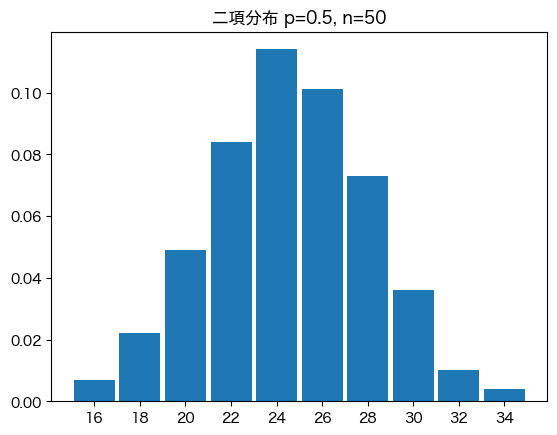

In [6]:
p = 0.5
n = 50

with pm.Model() as model3:
    x = pm.Binomial("x", p=p, n=n)

with model3:
    prior_samples3 = pm.sample_prior_predictive(random_seed=42)

x_samples3 = prior_samples3["prior"]["x"].to_numpy()
print(x_samples3)

summary3 = az.summary(prior_samples3, kind="stats")
display(summary3)

ax = az.plot_dist(x_samples3)
ax.set_title(f"二項分布 p={p}, n={n}");

# 正規分布 (pm.Normal クラス)

<Axes: xlabel='sepal_length', ylabel='Count'>

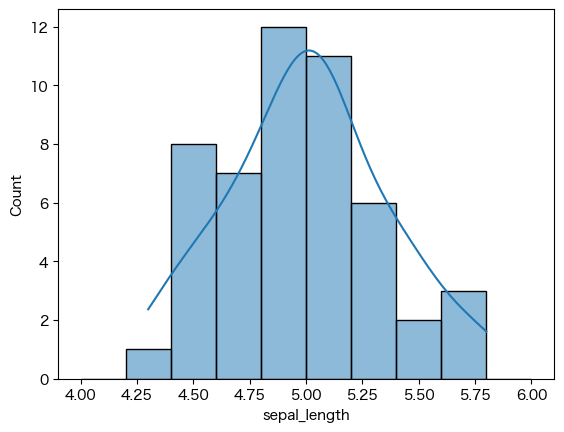

In [7]:
df = sns.load_dataset("iris")
df1 = df[df["species"] == "setosa"]
bins = np.arange(4.0, 6.2, 0.2)

sns.histplot(df1, x="sepal_length", bins=bins, kde=True)

## 確率分布を示す数式

$$
f(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp{\left( - \frac{(x - \mu)^2}{2 \sigma^2} \right)}
$$

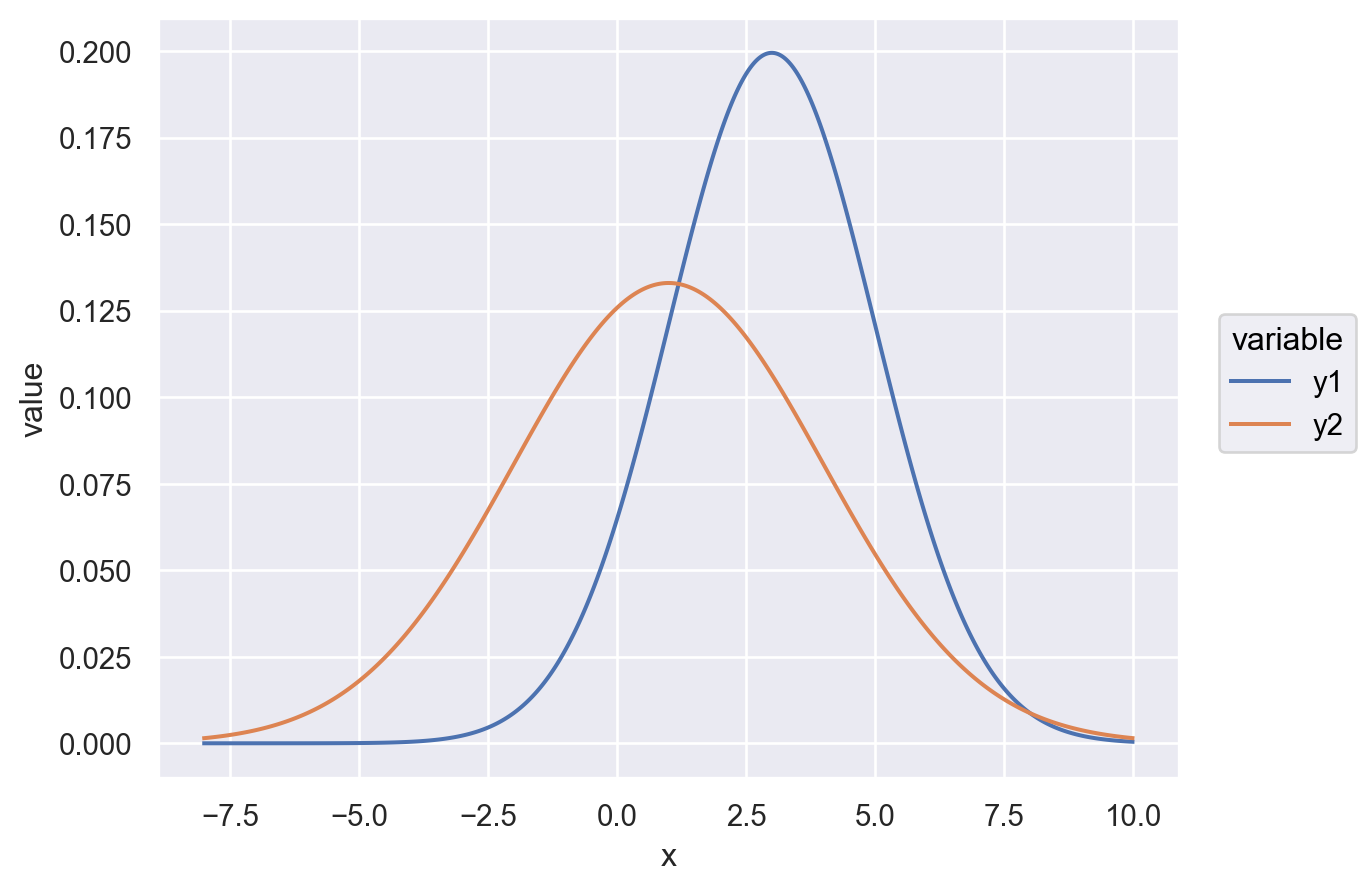

In [8]:
def norm(x, mu, sigma):
    return np.exp(-((x - mu) / sigma)**2 / 2) / (np.sqrt(2 * np.pi) * sigma)

mu1, sigma1 = 3.0, 2.0
mu2, sigma2 = 1.0, 3.0

x = np.arange(-8.0, 10.0, 0.01)
D = pd.DataFrame({"x": x, "y1": norm(x, mu1, sigma1), "y2": norm(x, mu2, sigma2)}).melt(id_vars="x")
(
    so.Plot(D, x="x", y="value", color="variable")
    .add(so.Lines())
)

Sampling: [x]


[[ 0.41832997  0.60557617  0.02878786 -1.084246    1.46422098  0.29072736
  -1.33075642 -0.03472346  0.28041847  0.10749307 -1.92080086  1.57864499
   1.00595719  0.45121505 -0.59343367  0.09382112  1.85195867 -0.25590475
  -0.28298637  0.415816   -1.08877401 -1.96729165  0.88737846 -1.32823784
  -0.13157981 -0.36196929  0.7820311   0.28266399 -1.00595013  0.01851214
  -1.24315953  2.60337585  0.15139223 -0.51553062 -0.2196374   0.40234591
   1.36128828  0.74287737  0.93685218  0.17547031  1.52520418  0.09821447
  -1.16490357  0.52358791 -1.06559789 -0.31079113  0.5559524  -0.09963476
  -0.25769078 -1.58951869 -1.81491229  0.53617305  1.27138979 -0.55403891
   1.72433064 -0.31178569  0.06331837  1.38212765  0.58472813 -0.50975014
   0.2513335   0.40621724  0.8656376  -0.53392518 -0.03877829  1.14263416
  -0.46350628  2.26692259 -0.5287392   0.32461586 -0.1544165  -0.81960771
  -1.20293573  0.09544837 -1.3617434   0.27737016  0.30665917 -1.40419209
  -1.53897176  1.59692719  1.26835706 

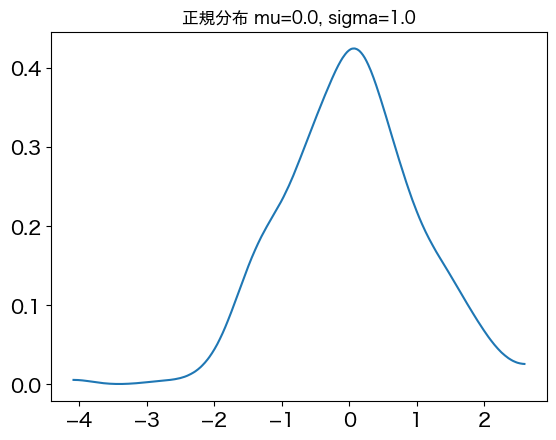

In [9]:
mu = 0.0
sigma = 1.0

with pm.Model() as model4:
    x = pm.Normal("x", mu=mu, sigma=sigma)

with model4:
    prior_samples4 = pm.sample_prior_predictive(random_seed=42)

x_samples4 = prior_samples4["prior"]["x"].to_numpy()
print(x_samples4[:, :100])

ax = az.plot_dist(x_samples4)
ax.set_title(f"正規分布 mu={mu}, sigma={sigma}");

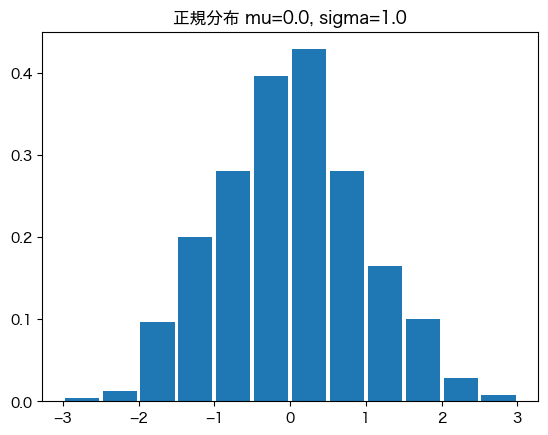

In [10]:
bins = np.arange(-3, 3.5, 0.5)
ax = az.plot_dist(x_samples4, kind="hist", hist_kwargs={"bins": bins})
plt.xticks(np.arange(-3, 4, 1))
ax.set_title(f"正規分布 mu={mu}, sigma={sigma}");

In [11]:
summary4 = az.summary(prior_samples4, kind="stats")
display(summary4)

,mean,sd,hdi_3%,hdi_97%
x,0.009,0.963,-1.59,1.9


Sampling: [x]


[[ 3.83665993  4.21115235  3.05757572  0.831508    5.92844195  3.58145471
   0.33848716  2.93055308  3.56083695  3.21498614 -0.84160171  6.15728998
   5.01191438  3.90243009  1.81313266  3.18764224  6.70391734  2.4881905
   2.43402725  3.83163201  0.82245197 -0.9345833   4.77475692  0.34352432
   2.73684039  2.27606141  4.56406221  3.56532797  0.98809973  3.03702427
   0.51368095  8.20675171  3.30278446  1.96893877  2.5607252   3.80469182
   5.72257657  4.48575474  4.87370435  3.35094062  6.05040837  3.19642895
   0.67019287  4.04717581  0.86880422  2.37841773  4.1119048   2.80073048
   2.48461844 -0.17903738 -0.62982457  4.07234609  5.54277957  1.89192218
   6.44866128  2.37642862  3.12663674  5.7642553   4.16945625  1.98049972
   3.502667    3.81243448  4.73127521  1.93214964  2.92244343  5.28526831
   2.07298744  7.53384519  1.9425216   3.64923171  2.691167    1.36078457
   0.59412855  3.19089675  0.2765132   3.55474032  3.61331834  0.19161582
  -0.07794351  6.19385438  5.53671412  

,mean,sd,hdi_3%,hdi_97%
x,3.018,1.927,-0.18,6.801


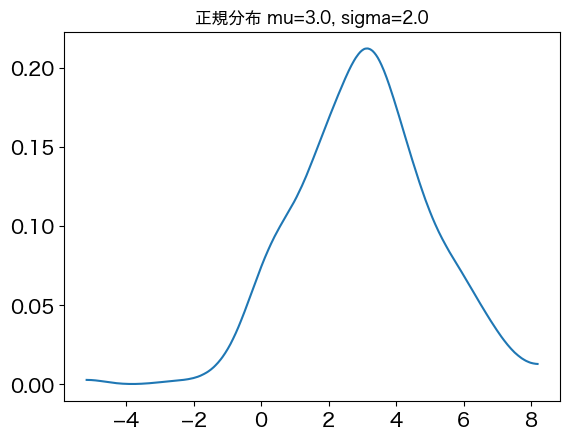

In [12]:
mu, sigma = 3.0, 2.0

with pm.Model() as model5:
    x = pm.Normal("x", mu=mu, sigma=sigma)
    prior_samples5 = pm.sample_prior_predictive(random_seed=42)

x_samples5 = prior_samples5["prior"]["x"].to_numpy()
print(x_samples5[:, :100])

summary5 = az.summary(prior_samples5, kind="stats")
display(summary5)

ax = az.plot_dist(x_samples5)
ax.set_title(f"正規分布 mu={mu}, sigma={sigma}");

# 一様分布 (pm.Uniform クラス)

$$
f(x) = \frac{1}{b-a} \qquad (a \le x < b)
$$

Sampling: [x]


[[0.91674416 0.91098667 0.8765925  0.30931841 0.95465607 0.17509458
  0.99662814 0.75203348 0.15038118 0.38334205 0.57929755 0.17545841
  0.24936317 0.92789618 0.45043938 0.08049801 0.92897428 0.0145879
  0.74506917 0.50817951 0.16114111 0.42722995 0.80989887 0.85133696
  0.06946216 0.57816756 0.13495204 0.55863526 0.72404236 0.77635178
  0.31264508 0.62936681 0.07600455 0.61244242 0.76271682 0.66850046
  0.01788179 0.89393369 0.68119886 0.05815091 0.21322457 0.88236378
  0.62095282 0.13583653 0.72843457 0.78909839 0.31787272 0.03725282
  0.07792079 0.50836923 0.51707609 0.22624359 0.34760498 0.9562864
  0.8728551  0.57262446 0.95135519 0.65216825 0.88258962 0.69665684
  0.98336328 0.92885887 0.64555302 0.40866512 0.70908829 0.55270282
  0.62742591 0.07837106 0.04155039 0.24832439 0.067527   0.38937433
  0.03959853 0.10557087 0.61048682 0.51127382 0.48346119 0.76838016
  0.63992093 0.82725158 0.0802972  0.0715233  0.73349723 0.56197244
  0.19509539 0.41326536 0.39160485 0.45042795 0.50

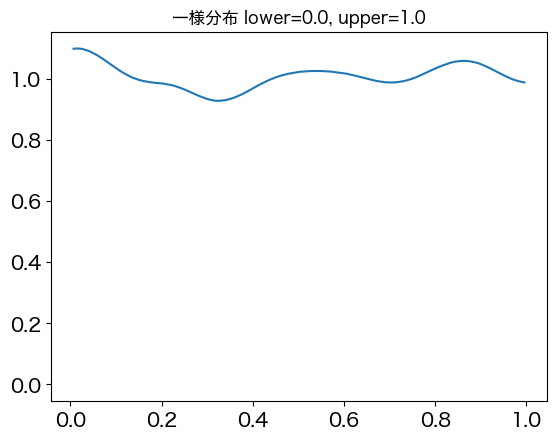

In [13]:
lower = 0.0
upper = 1.0

with pm.Model() as model6:
    x = pm.Uniform("x", lower=lower, upper=upper)

with model6:
    prior_samples6 = pm.sample_prior_predictive(random_seed=42)

x_samples6 = prior_samples6["prior"]["x"].to_numpy()
print(x_samples6[:, :100])

ax = az.plot_dist(x_samples6)
ax.set_title(f"一様分布 lower={lower}, upper={upper}");

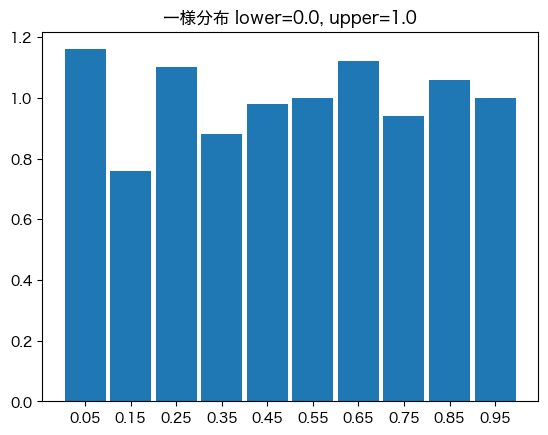

In [14]:
bins = np.arange(0.0, 1.1, 0.1)
ax = az.plot_dist(x_samples6, kind="hist", hist_kwargs={"bins": bins})
ax.set_title(f"一様分布 lower={lower}, upper={upper}");

In [15]:
summary6 = az.summary(prior_samples6, kind="stats")
display(summary6)

,mean,sd,hdi_3%,hdi_97%
x,0.502,0.289,0.037,0.956


Sampling: [x]


[[0.83339533 0.82878933 0.801274   0.34745473 0.86372486 0.24007566
  0.89730251 0.70162678 0.22030495 0.40667364 0.56343804 0.24036673
  0.29949054 0.84231694 0.46035151 0.1643984  0.84317942 0.11167032
  0.69605533 0.50654361 0.22891289 0.44178396 0.74791909 0.78106957
  0.15556973 0.56253405 0.20796163 0.54690821 0.67923388 0.72108142
  0.35011607 0.60349345 0.16080364 0.58995394 0.71017345 0.63480037
  0.11430543 0.81514695 0.64495909 0.14652073 0.27057966 0.80589103
  0.59676226 0.20866923 0.68274766 0.73127871 0.35429817 0.12980226
  0.16233663 0.50669539 0.51366087 0.28099487 0.37808398 0.86502912
  0.79828408 0.55809957 0.86108415 0.6217346  0.8060717  0.65732547
  0.88669063 0.8430871  0.61644242 0.4269321  0.66727063 0.54216225
  0.60194073 0.16269685 0.13324031 0.29865951 0.1540216  0.41149947
  0.13167882 0.18445669 0.58838946 0.50901906 0.48676895 0.71470413
  0.61193674 0.76180126 0.16423776 0.15721864 0.68679778 0.54957795
  0.25607631 0.43061229 0.41328388 0.46034236 0.

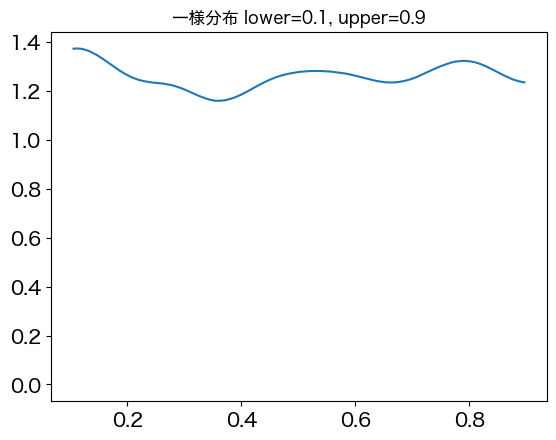

In [16]:
lower = 0.1
upper = 0.9

with pm.Model() as model7:
    x = pm.Uniform("x", lower=lower, upper=upper)
    prior_samples7 = pm.sample_prior_predictive(random_seed=42)

x_samples7 = prior_samples7["prior"]["x"].to_numpy()
print(x_samples7[:, :100])

ax = az.plot_dist(x_samples7)
ax.set_title(f"一様分布 lower={lower}, upper={upper}");

# ベータ分布 (pm.Beta クラス)

$$
\begin{split}
f(p) = C \cdot p^{\alpha - 1}(1 - p)^{\beta - 1} \\
C = \frac{(\alpha + \beta + 1)!}{(\alpha - 1)!(\beta - 1)!}
\end{split}
$$

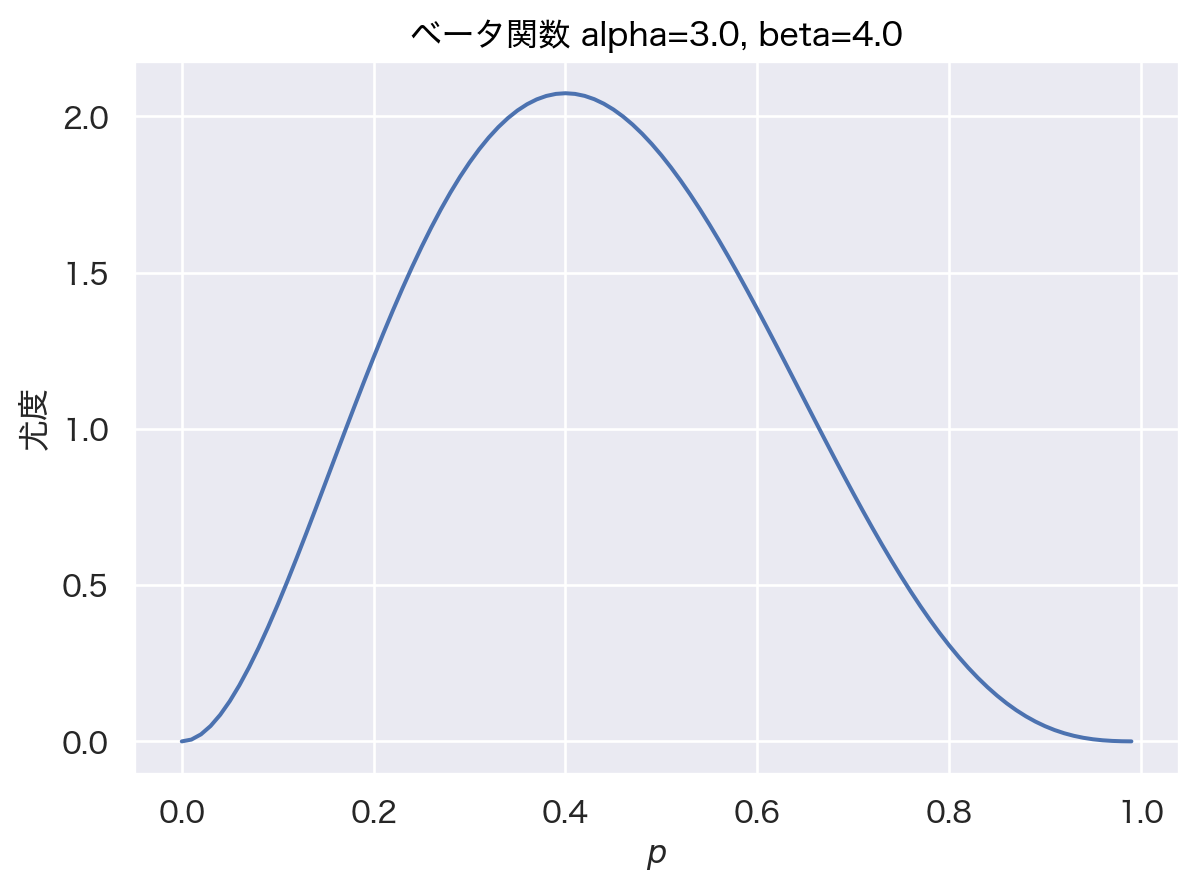

In [17]:
alpha = 2.0 + 1.0
beta = 3.0 + 1.0

def beta_func(p, alpha, beta):
    C = gamma(alpha + beta - 1) / (gamma(alpha - 1) * gamma(beta - 1))
    return C * p**(alpha-1) * (1-p)**(beta - 1)

p = np.arange(0.0, 1.0, 0.01)

(
    so.Plot(x=p, y=beta_func(p, alpha, beta))
    .add(so.Line())
    .label(x="$p$", y="尤度", title=f"ベータ関数 alpha={alpha}, beta={beta}")
    .theme({"font.family": "Hiragino Sans"})
)

Sampling: [p]


[[0.47810686 0.77844182 0.74451879 0.63851978 0.68891656 0.18191653
  0.31366816 0.43134204 0.47247866 0.49097759 0.76396861 0.20892371
  0.65893497 0.39801626 0.36106818 0.35676278 0.47753711 0.35908552
  0.4128828  0.68980539 0.76777851 0.47933876 0.2372802  0.15365419
  0.28630036 0.58293151 0.23093505 0.49224802 0.24837311 0.54873933
  0.37705104 0.43517663 0.63504575 0.45683045 0.68972524 0.56305255
  0.23745316 0.72427288 0.54018219 0.14068328 0.48874495 0.59364496
  0.47963674 0.21833518 0.31594381 0.73603573 0.24569626 0.08720277
  0.44745565 0.53201452 0.36199453 0.20267042 0.18945374 0.30017016
  0.21926062 0.57638301 0.30893057 0.38056641 0.66953246 0.19560578
  0.28389317 0.35122419 0.38597621 0.69091371 0.54946882 0.5357716
  0.44049528 0.41225119 0.50055203 0.80755198 0.52816239 0.36019269
  0.48544934 0.37435732 0.58793769 0.26573523 0.66157753 0.4687999
  0.62033278 0.29929357 0.8402134  0.28446085 0.67201397 0.73445346
  0.324377   0.32648633 0.51586496 0.22100987 0.72

Text(0.5, 1.0, 'ベータ分布 alpha=3.0, beta=4.0')

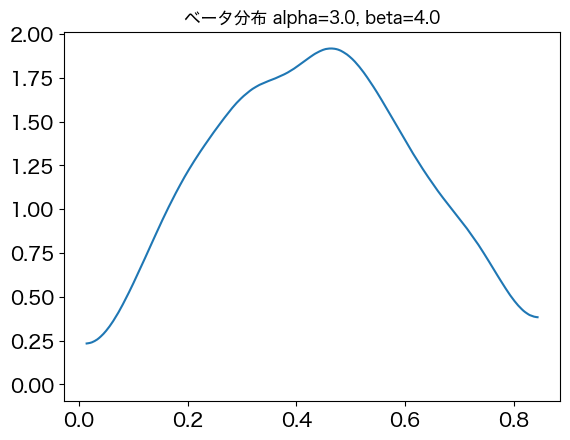

In [19]:
alpha = 2.0 + 1.0
beta = 3.0 + 1.0

with pm.Model() as model8:
    p = pm.Beta("p", alpha=alpha, beta=beta)
    prior_samples8 = pm.sample_prior_predictive(random_seed=42)

p_samples8 = prior_samples8["prior"]["p"].to_numpy()
print(p_samples8[:, :100])
ax = az.plot_dist(p_samples8)
ax.set_title(f"ベータ分布 alpha={alpha}, beta={beta}")

Text(0.5, 1.0, 'ベータ分布 alpha=3.0, beta=4.0')

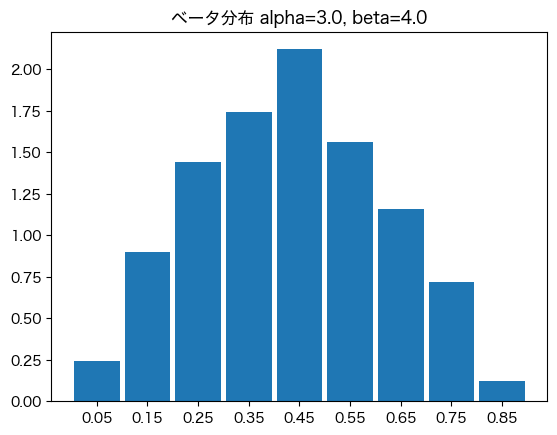

In [20]:
bins = np.arange(0, 1.0, 0.1)
ax = az.plot_dist(p_samples8, kind="hist", hist_kwargs={"bins": bins})
ax.set_title(f"ベータ分布 alpha={alpha}, beta={beta}")

In [21]:
summary8 = az.summary(prior_samples8, kind="stats")
display(summary8)

,mean,sd,hdi_3%,hdi_97%
p,0.433,0.181,0.12,0.76


Sampling: [p]


[[0.42330735 0.54035334 0.50875029 0.48199994 0.5097184  0.30994798
  0.36314643 0.40343135 0.42028356 0.43197266 0.53530931 0.32355796
  0.47381802 0.39567475 0.38118253 0.37936345 0.42108834 0.38101055
  0.39768921 0.49092269 0.53297592 0.4228698  0.34116122 0.28715128
  0.35100545 0.46102789 0.32905419 0.42187683 0.34354498 0.45166118
  0.38709281 0.40786948 0.47610241 0.41450615 0.49536889 0.45391551
  0.33580415 0.52349565 0.44574013 0.28114562 0.4280533  0.45614829
  0.42399465 0.58573177 0.49421673 0.37143174 0.38017472 0.49337712
  0.45772755 0.42760024 0.41201735 0.36934856 0.56745097 0.50864534
  0.45250566 0.32428311 0.47241999 0.39642411 0.35396347 0.42694125
  0.52628781 0.43163134 0.42881517 0.33573918 0.38026926 0.35507469
  0.41261812 0.36525608 0.27304036 0.42058491 0.31740478 0.3476402
  0.42160523 0.46937826 0.38609759 0.33778594 0.48352019 0.3151148
  0.35352122 0.3962185  0.41079709 0.24194236 0.42760528 0.34514101
  0.38695381 0.3387648  0.44485352 0.42426836 0.32

Text(0.5, 1.0, 'ベータ分布 alpha=21.0, beta=31.0')

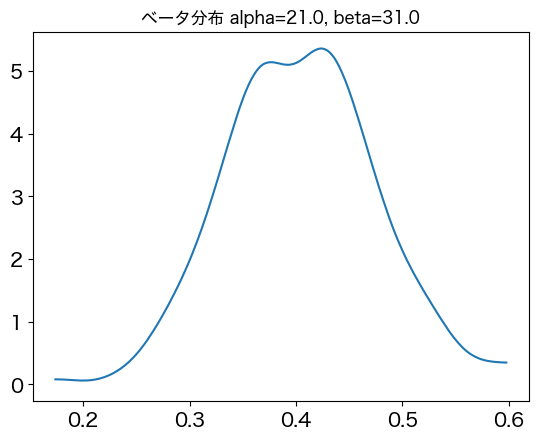

In [22]:
alpha = 20.0 + 1.0
beta = 30.0 + 1.0

with pm.Model() as model9:
    p = pm.Beta("p", alpha=alpha, beta=beta)
    prior_samples9 = pm.sample_prior_predictive(random_seed=42)

p_samples9 = prior_samples9["prior"]["p"].to_numpy()
print(p_samples9[:, :100])

ax = az.plot_dist(p_samples9)
ax.set_title(f"ベータ分布 alpha={alpha}, beta={beta}")

# 半正規分布 (pm.HalfNormal クラス)

$$
f(x) = \sqrt{\frac{2}{\pi \sigma^{2}}} \exp \left( - \frac{x^{2}}{2 \sigma^{2}} \right)
$$

In [23]:
sigma = 1.0
with pm.Model() as model10:
    x = pm.HalfNormal("x", sigma=sigma)
    prior_samples10 = pm.

SyntaxError: expected ':' (2283019671.py, line 2)

In [ ]:
:
